In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_excel(r"C:\Users\hp\OneDrive\heart_disease.xlsx",sheet_name = 'Heart_disease')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
903,53,Male,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4
907,57,Male,asymptomatic,142,277,True,st-t abnormality,182,FALSE,NaN,flat,fixed defect,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df['oldpeak'] = df['oldpeak'].fillna(df['oldpeak'].mean())

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [8]:
df['fbs']

0       True
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906     True
907     True
Name: fbs, Length: 908, dtype: bool

In [9]:
df['sex']

0      Male
1      Male
2      Male
3      Male
4      Male
       ... 
903    Male
904    Male
905    Male
906    Male
907    Male
Name: sex, Length: 908, dtype: object

In [10]:
df['fbs'] =df['fbs'].astype('object')

In [11]:
print(df['fbs'].dtype)

object


In [12]:
df['fbs'].unique()

array([True, False], dtype=object)

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='trestbps', ylabel='Count'>

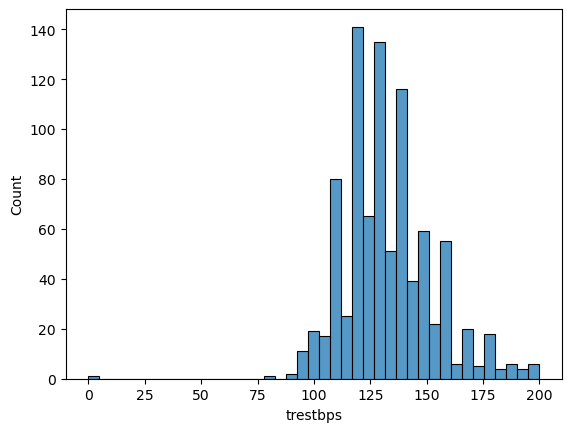

In [13]:
sns.histplot(df['trestbps'])

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='thalch', ylabel='Count'>

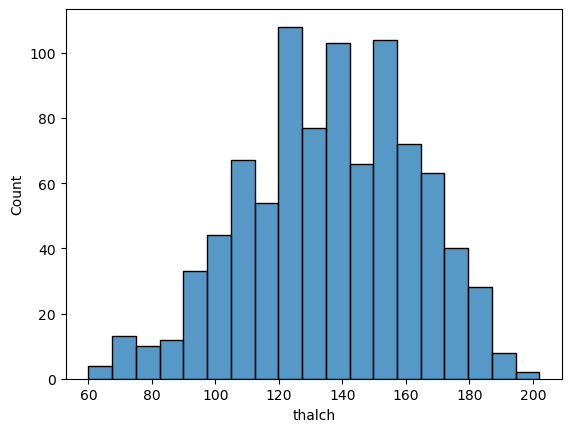

In [14]:
sns.histplot(df['thalch'])

In [15]:
df['exang'].value_counts()

exang
False    516
True     337
TURE      36
FALSE     19
Name: count, dtype: int64

In [16]:
df['exang'] = df['exang'].replace({'TURE': 'True', 'FALSE': 'False'})

print(df['exang'].value_counts())

exang
False    516
True     337
True      36
False     19
Name: count, dtype: int64


In [17]:
df['exang'] = df['exang'].astype('object')
print(df['exang'].dtype)

object


In [18]:
from sklearn.preprocessing import LabelEncoder

In [19]:
new_df = df.drop('exang',axis =1)
new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,2.300000,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,0.000000,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,0.400000,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,0.000000,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,1.500000,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,1.500000,upsloping,normal,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,3.000000,flat,reversable defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,2.500000,downsloping,fixed defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,0.891253,downsloping,fixed defect,4


In [20]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
oldpeak     0
slope       0
thal        0
num         0
dtype: int64

In [21]:
le_sex = LabelEncoder()
le_cp = LabelEncoder()
le_fbs = LabelEncoder()
le_restecg = LabelEncoder()
le_slope = LabelEncoder()
le_thal = LabelEncoder()

new_df['gender'] = le_sex.fit_transform(new_df['sex'])
new_df['cp_n'] = le_cp.fit_transform(new_df['cp'])
new_df['fbs_n'] = le_fbs.fit_transform(new_df['fbs'])
new_df['restecg_n'] = le_restecg.fit_transform(new_df['restecg'])
new_df['slope_n'] = le_slope.fit_transform(new_df['slope'])
new_df['thal_n'] = le_thal.fit_transform(new_df['thal'])

new_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,oldpeak,slope,thal,num,gender,cp_n,fbs_n,restecg_n,slope_n,thal_n
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,2.300000,downsloping,fixed defect,0,1,3,1,0,0,0
1,41,Male,atypical angina,135,203,False,normal,132,0.000000,flat,fixed defect,0,1,1,0,1,1,0
2,57,Male,asymptomatic,140,192,False,normal,148,0.400000,flat,fixed defect,0,1,0,0,1,1,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,0.000000,flat,fixed defect,0,1,3,0,0,1,0
4,57,Male,asymptomatic,110,201,False,normal,126,1.500000,flat,fixed defect,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,1.500000,upsloping,normal,4,1,0,0,1,2,1
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,3.000000,flat,reversable defect,4,1,0,0,2,1,2
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,2.500000,downsloping,fixed defect,4,1,2,0,0,0,0
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,0.891253,downsloping,fixed defect,4,1,2,1,2,0,0


In [22]:
New_df = new_df.drop(['sex','cp','restecg','slope','thal'],axis =1)
New_df

,age,trestbps,chol,fbs,thalch,oldpeak,num,gender,cp_n,fbs_n,restecg_n,slope_n,thal_n
0,63,145,233,True,150,2.300000,0,1,3,1,0,0,0
1,41,135,203,False,132,0.000000,0,1,1,0,1,1,0
2,57,140,192,False,148,0.400000,0,1,0,0,1,1,0
3,52,118,186,False,190,0.000000,0,1,3,0,0,1,0
4,57,110,201,False,126,1.500000,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,125,0,False,120,1.500000,4,1,0,0,1,2,1
904,62,166,170,False,120,3.000000,4,1,0,0,2,1,2
905,56,170,0,False,123,2.500000,4,1,2,0,0,0,0
906,56,144,208,True,105,0.891253,4,1,2,1,2,0,0


In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



X = New_df.drop('num', axis=1)  # Adjust the target column name
y = New_df['num']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification Report:')
print(classification_report(y_test, y_pred))

Accuracy: 0.49
Confusion Matrix:
[[63 19  2  4  1]
 [17 20  6  5  0]
 [ 5  8  6  1  2]
 [ 3 10  2  1  1]
 [ 1  2  2  1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.71      0.71        89
           1       0.34      0.42      0.37        48
           2       0.33      0.27      0.30        22
           3       0.08      0.06      0.07        17
           4       0.00      0.00      0.00         6

    accuracy                           0.49       182
   macro avg       0.29      0.29      0.29       182
weighted avg       0.48      0.49      0.49       182



In [24]:
New_df['cp_n'].value_counts()

cp_n
0    495
2    203
1    165
3     45
Name: count, dtype: int64

In [25]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

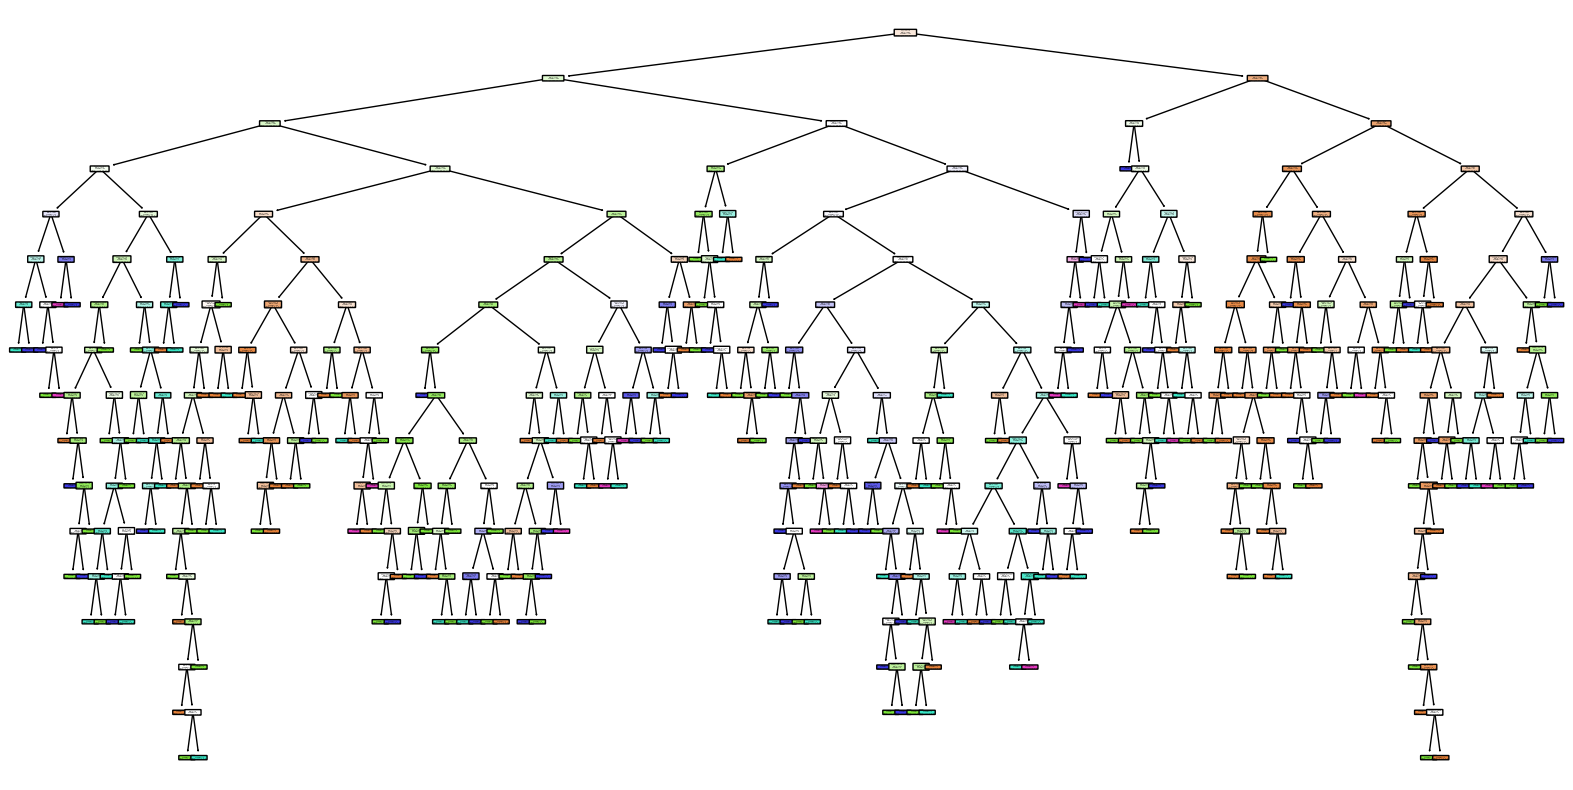

In [27]:
plt.figure(figsize=(20, 10)) 
plot_tree(clf, filled=True, feature_names=X.columns, rounded=True)
plt.show()

# Interview Assignment

In [ ]:
# 1. What are some common hyperparameters of decision tree models, and how do they affect the model's performance?
#
#a. max_depth: Specifies the maximum depth of the tree.
#Effect:
#Small value: Reduces the complexity of the tree, preventing overfitting but may lead to underfitting.
#Large value: Increases the tree's capacity to fit the data but may lead to overfitting.

#b. min_samples_split: The minimum number of samples required to split a node.
#Effect:
#Small value: Allows the tree to split even with a small number of samples, potentially overfitting the data.
#Large value: Prevents splitting with fewer samples, leading to a simpler tree and possibly underfitting.

#c. min_samples_leaf : The minimum number of samples required in a leaf node.
#Effect:
#Small value: Creates smaller leaf nodes, increasing model complexity and risk of overfitting.
#Large value: Forces leaf nodes to have more samples, simplifying the tree and reducing overfitting.

#d. max_features: The maximum number of features considered for splitting at each node.
#Effect:
#Small value: Limits feature use, reducing variance and increasing bias (simpler tree).
#Large value: Uses more features, which may reduce bias but increase the risk of overfitting.

#e. criterion: The function used to measure the quality of a split. Common values:
#gini: Uses Gini Impurity.
#entropy: Uses Information Gain.
#Effect:
#Choice of criterion affects how splits are evaluated. There is usually little difference in accuracy, but computational efficiency may vary.

#f. max_leaf_node: Limits the number of leaf nodes in the tree.
#Effect:
#Controls complexity by capping the number of terminal nodes.
#Lower values reduce overfitting but may cause underfitting.

#g. min_impurity_decrease: A split will only be performed if it reduces impurity by at least this threshold.
#Effect:
#Helps prevent unnecessary splits, reducing the risk of overfitting.

In [ ]:
# 2. What is the difference between the Label encoding and One-hot encoding?

#label encoding : it convert categorical items into differnet unique number starting from 1 . each unique item is give a unique number

# onehot encoding : it converts unique item in zeros and ones, and create number of column equal to number of items 